# Basics > Correlation


<div class="alert alert-info">How correlated are the variables in the data?</div>


Create a correlation matrix of selected numeric variables (`int` or `float`). Correlations and p.values are provided for each variable pair. 

> WIP Radiant-for-Python web UI for Correlation is in the works. Check back soon ...

In [1]:
import matplotlib as mpl

import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 100

In [2]:
## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

Loading the "salary" dataset from pyrsm and adding it to the global environment.

In [3]:
salary, salary_description = rsm.load_data(pkg="basics", name="salary")
salary

salary,rank,discipline,yrs_since_phd,yrs_service,sex
i32,cat,cat,i32,i32,cat
139750,"""Prof""","""B""",19,18,"""Male"""
173200,"""Prof""","""B""",20,16,"""Male"""
79750,"""AsstProf""","""B""",4,3,"""Male"""
115000,"""Prof""","""B""",45,39,"""Male"""
141500,"""Prof""","""B""",40,41,"""Male"""
…,…,…,…,…,…
103106,"""Prof""","""A""",33,30,"""Male"""
150564,"""Prof""","""A""",31,19,"""Male"""
101738,"""Prof""","""A""",42,25,"""Male"""


In [4]:
rsm.md(salary_description)

## Salaries for Professors

### Description

The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a college in the U.S. The data were collected as part of the on-going effort of the college's administration to monitor salary differences between male and female faculty members. A data frame with 397 observations on the following 6 variables.

### Variables

- rank = a factor with levels AsstProf, AssocProf, and Prof
- discipline = a factor with levels A ('theoretical' departments) or B ('applied' departments)
- yrs_since_phd = years since PhD
- yrs_service = years of service
- sex = a factor with levels Female and Male
- salary = nine-month salary, in dollars

### Source

Fox J. and Weisberg, S. (2011) An R Companion to Applied Regression, Second Edition Sage.


To create a correlation object use `rsm.basics.correlation`. The created object has attributes and methods that you can use to get the information you need. For example. the `.cr` attribute shows the correlation matrix as a two dimension numpy array.

In [5]:
cr = rsm.basics.correlation({"salary": salary})
cr.cr

array([[0.        , 0.41923111, 0.33474468],
       [0.41923111, 0.        , 0.90964915],
       [0.33474468, 0.90964915, 0.        ]])

In [6]:
cr = rsm.basics.correlation({"salary": salary[["salary", "yrs_since_phd", "yrs_service"]]})
cr.cr

array([[0.        , 0.41923111, 0.33474468],
       [0.41923111, 0.        , 0.90964915],
       [0.33474468, 0.90964915, 0.        ]])

Documentation about how to create a correlation object and how to acces its attrubutes is shown below.

Correlation objects have two methods: `summary` and `plot`. 

In [7]:
cr.summary()

Correlation
Data     : salary
Method   : pearson
Cutoff   : 0
Variables: salary, yrs_since_phd, yrs_service
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated



GT(_tbl_data=shape: (2, 3)
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
│ ---           ┆ ---    ┆ ---           │
│ str           ┆ str    ┆ str           │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆ 0.42   ┆               │
│ yrs_service   ┆ 0.33   ┆ 0.91          │
└───────────────┴────────┴───────────────┘, _body=<great_tables._gt_data.Body object at 0x7f29461c6510>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='salary', type=<ColInfoTypeEnum.default: 1>, column_label='salary', column_align='left', column_width=None), ColInfo(var='yrs_since_phd', type=<ColInfoTypeEnum.default: 1>, column_label='yrs_since_phd', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f29461c6270>, _spanners=Spanners([]), _heading=Heading(title='Correlation Matrix', subtitle='Method: pearson', preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x7f29461c6900>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x7f2946060910>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f29461c6a50>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='0px'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='v

GT(_tbl_data=shape: (2, 3)
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
│ ---           ┆ ---    ┆ ---           │
│ str           ┆ str    ┆ str           │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆ 0.0    ┆               │
│ yrs_service   ┆ 0.0    ┆ 0.0           │
└───────────────┴────────┴───────────────┘, _body=<great_tables._gt_data.Body object at 0x7f2946061090>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='salary', type=<ColInfoTypeEnum.default: 1>, column_label='salary', column_align='left', column_width=None), ColInfo(var='yrs_since_phd', type=<ColInfoTypeEnum.default: 1>, column_label='yrs_since_phd', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f2946060e10>, _spanners=Spanners([]), _heading=Heading(title='P-values', subtitle='', preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x7f2946061450>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x7f294622ce90>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f2946061590>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='0px'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), 

We can use the `plot` method to get a visual representation of the correlation matrix. Note that scatter plots in the graph at most 1,000 data points by default. To generate scatter plots that use all observations use `plot(n = -1)`.

Stars shown in the plot are interpreted as:

- p.value between 0 and 0.001:  ***
- p.value between 0.001 and 0.01: **
- p.value between 0.01 and 0.05: *
- p.value between 0.05 and 0.1: .

In the graph below all observations all observations are use to calculate the correlations but only 50 randomly sampled observations are used to generate the scatter plots. The `salary` dataset has only 397 observations so this option isn't really needed. However, for datasets with many thousands of rows, scatter plots are very slow to generate. The default value for `nobs` is set to 1,000.

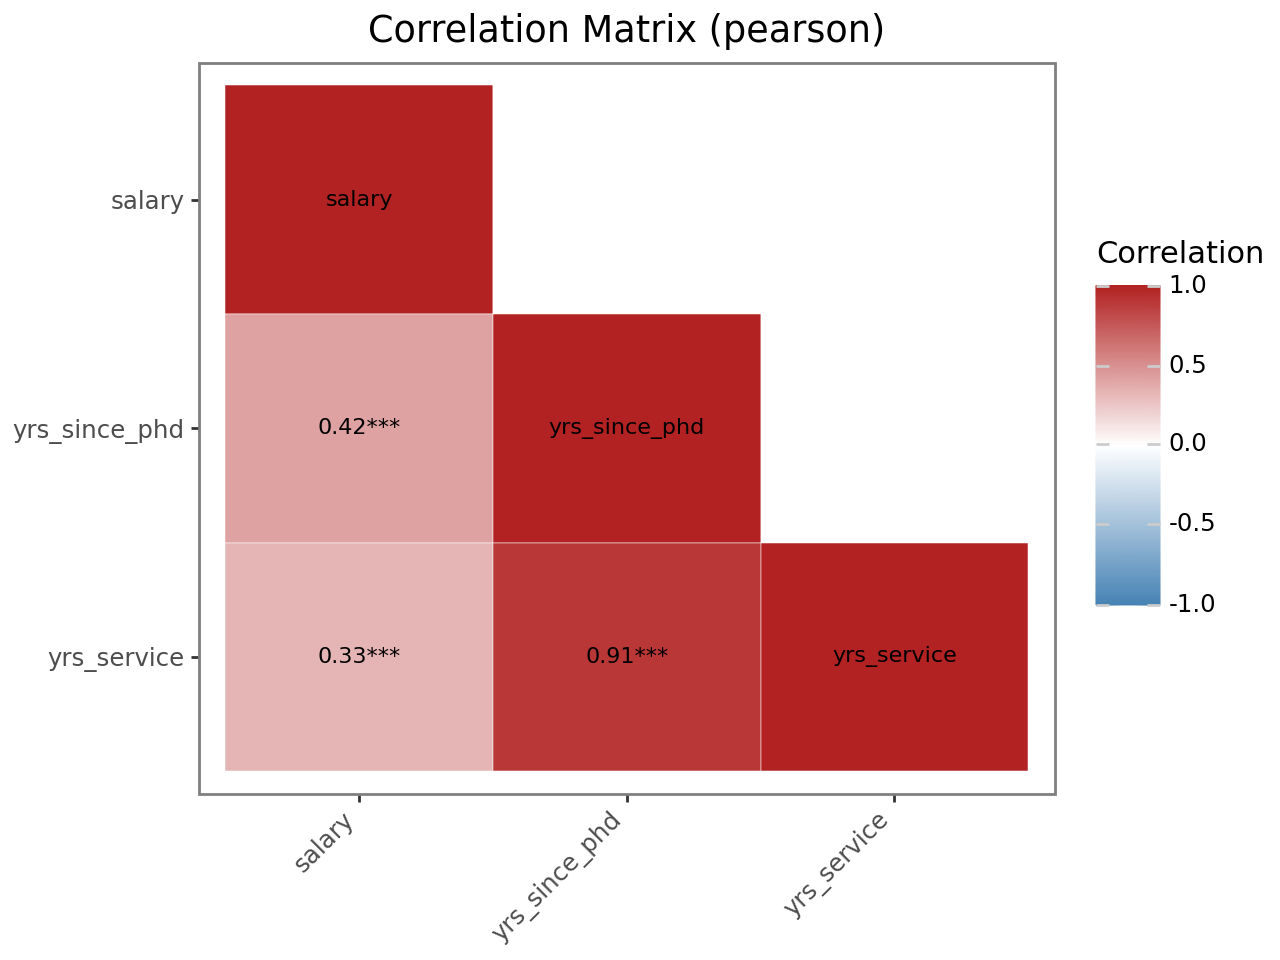

In [8]:
cr.plot(nobs=50)

In [9]:
cr.summary(cov=True)

Correlation
Data     : salary
Method   : pearson
Cutoff   : 0
Variables: salary, yrs_since_phd, yrs_service
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated



GT(_tbl_data=shape: (2, 3)
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
│ ---           ┆ ---    ┆ ---           │
│ str           ┆ str    ┆ str           │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆ 0.42   ┆               │
│ yrs_service   ┆ 0.33   ┆ 0.91          │
└───────────────┴────────┴───────────────┘, _body=<great_tables._gt_data.Body object at 0x7f28f5d53df0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='salary', type=<ColInfoTypeEnum.default: 1>, column_label='salary', column_align='left', column_width=None), ColInfo(var='yrs_since_phd', type=<ColInfoTypeEnum.default: 1>, column_label='yrs_since_phd', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f2946034cd0>, _spanners=Spanners([]), _heading=Heading(title='Correlation Matrix', subtitle='Method: pearson', preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x7f2945f76c40>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x7f2945f9e570>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f2946035a90>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='0px'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='v

GT(_tbl_data=shape: (2, 3)
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
│ ---           ┆ ---    ┆ ---           │
│ str           ┆ str    ┆ str           │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆ 0.0    ┆               │
│ yrs_service   ┆ 0.0    ┆ 0.0           │
└───────────────┴────────┴───────────────┘, _body=<great_tables._gt_data.Body object at 0x7f2946059040>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='salary', type=<ColInfoTypeEnum.default: 1>, column_label='salary', column_align='left', column_width=None), ColInfo(var='yrs_since_phd', type=<ColInfoTypeEnum.default: 1>, column_label='yrs_since_phd', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f2945f76b10>, _spanners=Spanners([]), _heading=Heading(title='P-values', subtitle='', preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x7f28f4154050>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x7f28f4154160>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f2945f76ea0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='0px'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), 

GT(_tbl_data=shape: (2, 3)
┌───────────────┬────────────┬───────────────┐
│               ┆ salary     ┆ yrs_since_phd │
│ ---           ┆ ---        ┆ ---           │
│ str           ┆ str        ┆ str           │
╞═══════════════╪════════════╪═══════════════╡
│ yrs_since_phd ┆ 163,640.55 ┆               │
│ yrs_service   ┆ 131,869.3  ┆ 152.47        │
└───────────────┴────────────┴───────────────┘, _body=<great_tables._gt_data.Body object at 0x7f2946076b30>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='salary', type=<ColInfoTypeEnum.default: 1>, column_label='salary', column_align='left', column_width=None), ColInfo(var='yrs_since_phd', type=<ColInfoTypeEnum.default: 1>, column_label='yrs_since_phd', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f2945f77230>, _spanners=Spanners([]), _heading=Heading(title='Covariance Matrix', subtitle='', preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x7f2945faa450>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x7f2945faa350>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f2945f77100>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='0px'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category=

When the number of observations in a dataset is more than 1,000 and you want to use all observations to calculate the correlations and generate the scatter plots use `nobs = -1`.

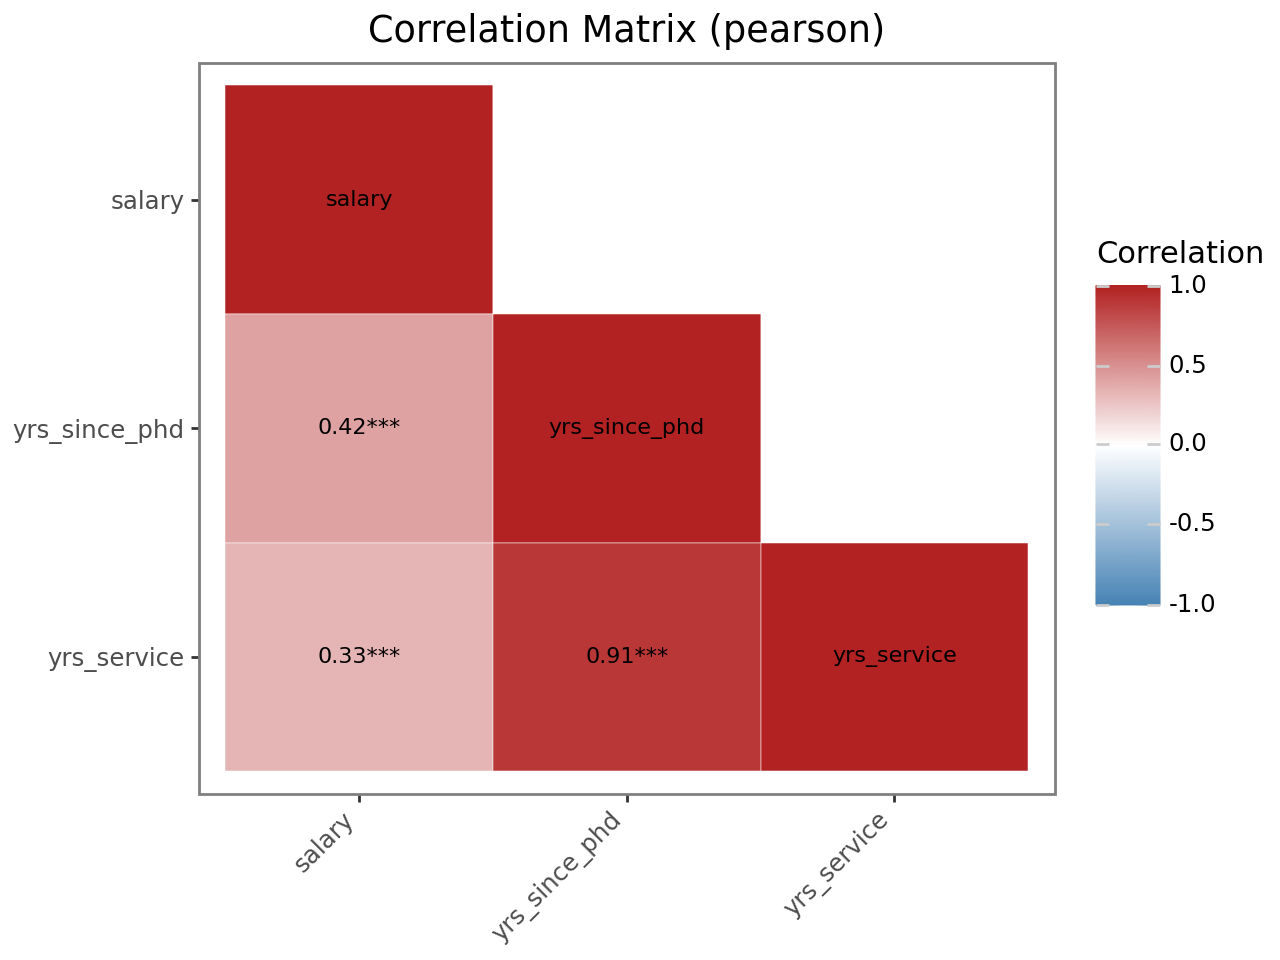

In [10]:
cr.plot(nobs=-1)

The font-size used in the plot is proportional to the size and significance of the correlation between two variables.

### Correlation cutoff

To show only correlations above a certain value choose a non-zero value in the numeric input between 0 and 1 (e.g., 0.15).

In [11]:
cr.summary(cutoff=0.5)

Correlation
Data     : salary
Method   : pearson
Cutoff   : 0.5
Variables: salary, yrs_since_phd, yrs_service
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated



GT(_tbl_data=shape: (2, 3)
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
│ ---           ┆ ---    ┆ ---           │
│ str           ┆ str    ┆ str           │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆        ┆               │
│ yrs_service   ┆        ┆ 0.91          │
└───────────────┴────────┴───────────────┘, _body=<great_tables._gt_data.Body object at 0x7f2945fb2510>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='salary', type=<ColInfoTypeEnum.default: 1>, column_label='salary', column_align='left', column_width=None), ColInfo(var='yrs_since_phd', type=<ColInfoTypeEnum.default: 1>, column_label='yrs_since_phd', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f2945f9e8d0>, _spanners=Spanners([]), _heading=Heading(title='Correlation Matrix', subtitle='Method: pearson', preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x7f29460db200>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x7f29460dae40>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f2945f9f650>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='0px'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='v

GT(_tbl_data=shape: (2, 3)
┌───────────────┬────────┬───────────────┐
│               ┆ salary ┆ yrs_since_phd │
│ ---           ┆ ---    ┆ ---           │
│ str           ┆ str    ┆ str           │
╞═══════════════╪════════╪═══════════════╡
│ yrs_since_phd ┆        ┆               │
│ yrs_service   ┆        ┆ 0.0           │
└───────────────┴────────┴───────────────┘, _body=<great_tables._gt_data.Body object at 0x7f2945fb25d0>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='salary', type=<ColInfoTypeEnum.default: 1>, column_label='salary', column_align='left', column_width=None), ColInfo(var='yrs_since_phd', type=<ColInfoTypeEnum.default: 1>, column_label='yrs_since_phd', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f28f41f8380>, _spanners=Spanners([]), _heading=Heading(title='P-values', subtitle='', preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x7f28ef7018d0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x7f28ef701b70>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f28f41f86b0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='0px'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), 

# Radiant for Python App: Correltion

Now lets re-run the analysis using a web-based user interface. In the _Summary_ tab you don't need to select select any variables as it will pull in all numeric variables by default. You and change the calculation method, set a correlation cutt-off, show covariance matrix, and set the number of decimal place to show. The _Plot_ tab allows you to change the number of observations used to generate the scatter plots and the size of the font used in the plot.

> Note: The app will continue running until you press the `Stop` button in the app navigation bar or the stop button next to the notebook cell

In [12]:
# rsm.radiant.basics.correlation({"salary": salary}, {"salary": salary_description}, code=True)

<p align="center">
<img src="figures/correlation-summary.png">
</p>

<p align="center">
<img src="figures/correlation-plot.png">
</p>

© Vincent Nijs (2025)